In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
%matplotlib inline

[sklearn ordinary least squares](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

---
#The Normal Equations
---

---
### * Solve for theta analytically
### * Not an iterative algorithm (like gradient descent)
### * Takes the cost function, find it's derivative and sets equal to zero
### * Derivation is complicated and involved
### * End up with a set of simultaneous equations
### * The matrix containing the training data is known as the "Design" matrix
### * No need to feature scale
---

In [2]:
#This code creates an artificial dataset of 100 points
m = 100

#Generate m points between 1000 and 3000 as input features x
x=np.array(np.linspace(1000,3000,m))

#Generate a little noise to add to x
z = np.random.rand(m)*100

#Now generate y - a straight line with added noise. The slope is theta1 (0.6) and the y intercept is theta0 (50)
theta0 = 50
theta1 = 0.6
y = [xx*theta1 + theta0 for xx in x] + z

In [3]:
#set the hyper-parameters of the model
clf = linear_model.LinearRegression(fit_intercept=True)

#for using scikit learn you always need to get the input arrays into the correct 'shape'
#x1 = x_scaled.reshape(m,1)
x1 = x.reshape(m, 1)
#fit the model
clf.fit(x1, y)

y_true = y
y_pred = clf.predict(x1)
print mean_squared_error(y_true, y_pred)

743.159430947


[ 0.59584759]
114.453716838


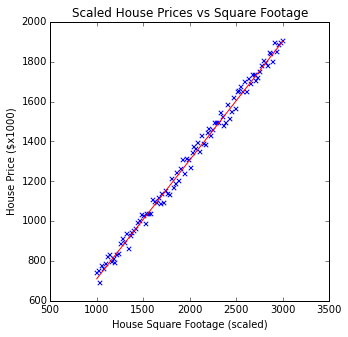

In [4]:
#plot the results
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("House Square Footage (scaled)")
ax.set_ylabel("House Price ($x1000)")
ax.set_title("Scaled House Prices vs Square Footage")
ax.scatter(x1, y, marker='x', color='b')
ax.plot(x1, clf.predict(x1), color='r')

#print out theta1 and theta0
print clf.coef_
print clf.intercept_

##Gradient Descent downsides:
###Need to choose alpha
###May be slow to converge (it's iterative)
##Normal Equations downsides:
###Computationally expensive, slow if N is very large (inverting and NxN matrix). O(n3)!! n<1000000
##Consider them complementary - for the size of the dataset


---

---
#This section is optional
---

---

##You can solve for theta using the following equation

##$$\theta = (x^{T}x)^{-1}x^{T}y$$
##$x$ is the training set augmented with a column of 1's, and known as the Design Matrix

##Below $x2$ is the Design Matrix. 
##It is a $m$ by $(n+1)$ matrix, where $m$ is the number of training examples, and $n$ is the number of features ($1$ in this example)

In [5]:
#create the desing matrix
x2 = np.ndarray(shape=(m,2))

#set the first column to 1.0
x2[:,0] = 1.0

#set the second column to the training set
x2[:,1] = x

---
## Where numpy excels - doing Linear Algebra
---

In [6]:
#solve for theta

#this is x transpose T multiplied by x
xtemp = np.dot(x2.T, x2)

#this is the inverse of (x.T . x)
xtemp_inverse = np.linalg.pinv(xtemp)

#this is the inverse multiplied by x transpose
xtemp1 = np.dot(xtemp_inverse,x2.T)

#this is the final step, multiplying by y
theta = np.dot(xtemp1, y)

##Compare the slope and intercept below with the values from sklearn

In [7]:
print "the slope and y intercept are:"
for i in xrange(len(theta)):
    print "{:5.2f}".format(np.float(theta[i]))

the slope and y intercept are:
114.45
 0.60


In [8]:
#The standard equation for a straight line
def make_prediction(x, theta0, theta1):
    return (theta1 * x) + theta0

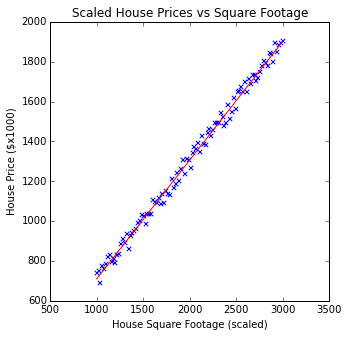

In [9]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("House Square Footage (scaled)")
ax.set_ylabel("House Price ($x1000)")
ax.set_title("Scaled House Prices vs Square Footage")
ax.scatter(x1, y, marker='x', color='b')
ax.plot(x1, make_prediction(x1, theta[0], theta[1]), color='r')